## Ionisation state modelling

Figure which highlights the likely ionisation state in the ejecta as a function of electron-density, deposition-rates and temperature-dependent recombination-rate coefficients. 

1.020008367555388e-12 5.0877612383958286e-12
6.853130049543353e-13 3.079277637495739e-12
4.8571308218243724e-12


(1.8507591517380468, 1.4705882352941175)

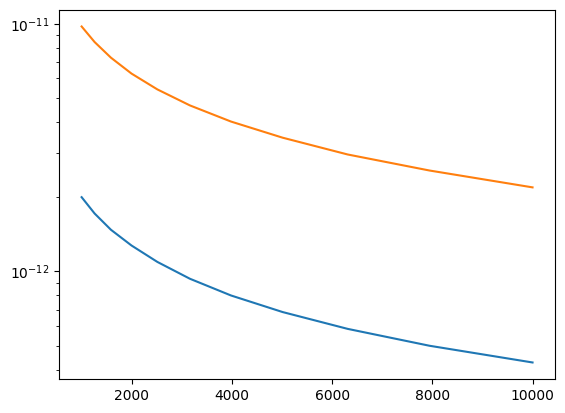

In [52]:
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Temperature; Recombination-rate
T_list = np.array([3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0])
    
alpha_HeII = [1.99e-12, 1.71e-12, 1.47e-12, 1.27e-12, 1.09e-12, 9.32e-13, 7.98e-13, 6.84e-13, 5.85e-13, 5.00e-13, 4.28e-13]
alpha_HeIII = [9.73e-12, 8.42e-12, 7.28e-12, 6.28e-12, 5.42e-12, 4.67e-12, 4.02e-12, 3.46e-12, 2.96e-12, 2.55e-12, 2.18e-12]
plt.plot(10**T_list, alpha_HeII)
plt.plot(10**T_list, alpha_HeIII)

plt.yscale('log')

print( interp1d(10**T_list, alpha_HeII)(2800), interp1d(10**T_list, alpha_HeIII)(2800) )

print( interp1d(10**T_list, alpha_HeII)(5000), interp1d(10**T_list, alpha_HeIII)(6000) )

print( interp1d(10**T_list, alpha_HeIII)(3000) )

1.2683493157243375e-12/6.853130049543353e-13, 1/0.68

In [2]:
import astropy.units as u
import astropy.constants as c

m_ejecta = (0.05 * u.Msun).to('g')
m_par = (80 * c.m_p).to('g')
m_par2 = (150 * c.m_p).to('g')

(9.4e7 *u.erg/u.s/u.g * m_par).to('eV/s'), (1.2e9 *u.erg/u.s/u.g * m_par2).to('eV/s')

(<Quantity 0.00785064 eV / s>, <Quantity 0.18791433 eV / s>)

In [10]:
#4e9 *(1*u.erg).to('eV')/u.s/u.g * (150 * c.m_p).to('g')  #*    (0.05 * u.Msun).to('g')

In [53]:
r_rate_IItI = 1e-12
r_rate_IIItII = 5e-12

ne = 1e5

i_rate_ItII = 1e-7 * 5
i_rate_IItIII = 1e-6 * 5

r_ItoII = r_rate_IItI*ne/i_rate_ItII
r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII


n1 = 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII )

n2 = 1/(1+r_ItoII+1/r_IItoIII )

n3 = 1/(1+r_ItoII*r_IItoIII+r_IItoIII)

print(n1,n2,n3, n1+n2+n3)

0.017857142857142856 0.08928571428571429 0.8928571428571428 1.0


In [54]:
ne_arr = np.logspace(3.5,7.5)
n1_append = []
n2_append = []
n3_append = []
for ne in ne_arr: 
    r_ItoII = r_rate_IItI*ne/i_rate_ItII
    r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII

    n1_append.append( 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII ) )
    n2_append.append( 1/(1+r_IItoIII+1/r_ItoII ) )
    n3_append.append( 1/(1+r_ItoII*r_IItoIII+r_IItoIII) )
    

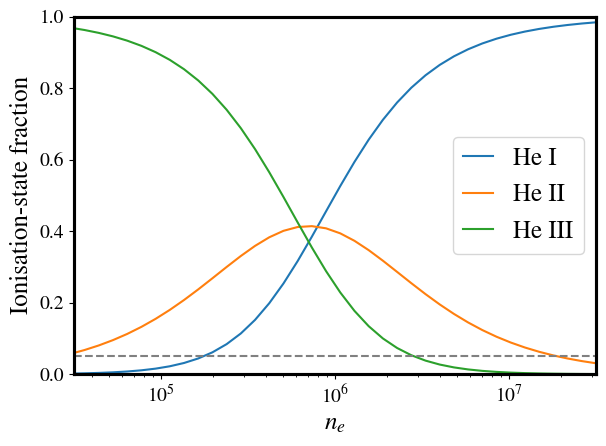

In [55]:
def reset_plt(ticksize,fontsize):
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = False
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    
reset_plt(14,18)    
    
plt.plot(ne_arr, n1_append, label='He I')
plt.plot(ne_arr, n2_append, label='He II')
plt.plot(ne_arr, n3_append, label='He III')
plt.xscale('log')

plt.axhline(1, ls='--', color='k')
plt.axhline(0.05, ls='--', color='grey')
plt.legend(frameon=True, handlelength=1.2)
plt.xlabel('$n_e$'), plt.ylabel('Ionisation-state fraction')
plt.ylim(0,1), plt.xlim(10**4.5, 10**7.5)

plt.tight_layout()
#plt.savefig('He_Ionisation_fraction.png', dpi=300)

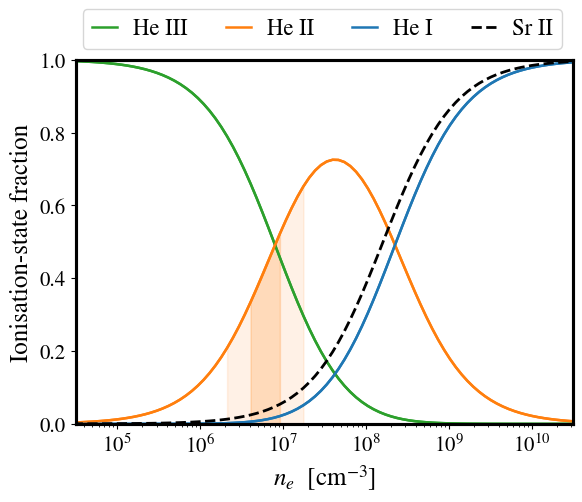

In [56]:
reset_plt(15,19)    

plt.figure(figsize=(6.2,5.5))

for corr in [1]:   
    T = 2800
    r_rate_IItI, r_rate_IIItII = interp1d(10**T_list, alpha_HeII)(T), interp1d(10**T_list, alpha_HeIII)(T)
    i_rate_ItII = 2.3e-4*corr#/5 #* 5 #1e-7 * 2 # 1e-7 * 2
    i_rate_IItIII = 4.1e-5*corr#/5 #* 5 #1e-6 * 2 # 1e-6 * 2

    ne_arr = np.logspace(3.5,10.5, 100)
    n1_append = []
    n2_append = []
    n3_append = []
    for ne in ne_arr: 
        r_ItoII = r_rate_IItI*ne/i_rate_ItII
        r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII

        n1_append.append( 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII ) )
        n2_append.append( 1/(1+1/r_IItoIII+r_ItoII ) )
        n3_append.append( 1/(1+r_ItoII*r_IItoIII+r_IItoIII) )

    lw = 1.8
    plt.plot(ne_arr, n1_append, color='C0', linewidth=lw)
    plt.plot(ne_arr, n2_append, color='C1', linewidth=lw)

    n2_append = np.array(n2_append)
    #plt.fill_between(ne_arr[n2_append>0.05], 0.0*np.ones_like(n2_append[n2_append>0.05]), n2_append[n2_append>0.05], 
    #                 color='C1', linewidth=1.1, alpha=0.1)

    #plt.fill_between(ne_arr[n2_append>0.2], 0.0*np.ones_like(n2_append[n2_append>0.2]), n2_append[n2_append>0.2], 
    #                 color='C1', linewidth=1.1, alpha=0.1)

    ## Specified range in density
    plt.fill_between(ne_arr[(ne_arr>4e6) & (ne_arr<1e7)], 0.0*np.ones_like(n2_append[(ne_arr>4e6) & (ne_arr<1e7)]), 
                     n2_append[(ne_arr>4e6) & (ne_arr<1e7)], 
                     color='C1', linewidth=1.1, alpha=0.2)

    plt.fill_between(ne_arr[(ne_arr>4e6/2) & (ne_arr<1e7*2)], 0.0*np.ones_like(n2_append[(ne_arr>4e6/2) & (ne_arr<1e7*2)]), 
                     n2_append[(ne_arr>4e6/2) & (ne_arr<1e7*2)], 
                     color='C1', linewidth=1.1, alpha=0.1)

        
    plt.plot(ne_arr, n3_append, color='C2', linewidth=lw)
    

plt.plot(ne_arr, n3_append, label='He III', linewidth=lw, color='C2')
plt.plot(ne_arr, n2_append, label='He II', linewidth=lw, color='C1')
plt.plot(ne_arr, n1_append, label='He I', linewidth=lw, color='C0')
    
t_d = 4.4
ion_rate = t_d**(-1.3) / 300
rHe_ItoII = 3e-12*ne_arr/ion_rate

plt.plot(ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=2, label='Sr II', ls='--' )
#plt.plot(1/2*ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=3 )
plt.xscale('log')
    
plt.xscale('log')
#plt.axhline(1, ls='--', color='k')
#plt.axhline(0.05, ls='--', color='grey')
plt.legend(frameon=True, handlelength=1.1, ncol=4, columnspacing=1.7, handletextpad=0.7, 
          bbox_to_anchor=(1, 1.17), fontsize=16.3)
plt.xlabel('$n_e$  [cm$^{-3}$]', fontsize=18), plt.ylabel('Ionisation-state fraction', fontsize=18)
plt.ylim(0,1.0), plt.xlim(10**4.5, 10**10.5)

plt.tight_layout()
#plt.title('Including ionisation-rate uncertainties')
#plt.ylim(0.01, 1), plt.yscale('log')
#plt.savefig('He_Ionisation_fraction_various_ionisation_rates+SrII_ne_region.png', dpi=300)

((0.0, 1.0), (31622.776601683792, 31622776601.683792))

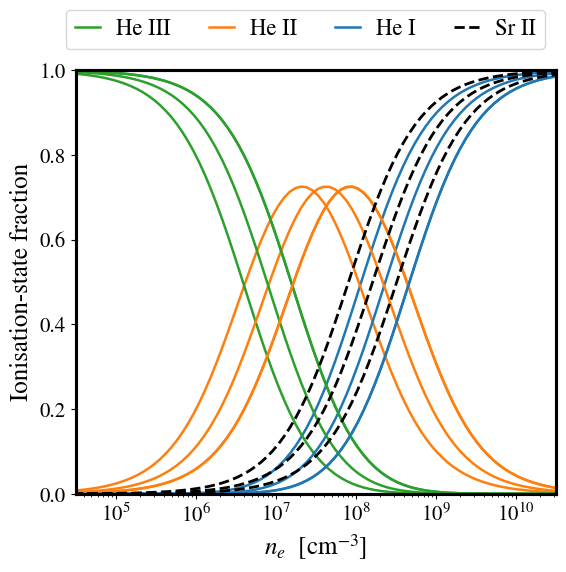

In [57]:
reset_plt(15,19)    

plt.figure(figsize=(6.2,5.5))

for corr in [0.5, 1, 2]:   
    T = 2800
    r_rate_IItI, r_rate_IIItII = interp1d(10**T_list, alpha_HeII)(T), interp1d(10**T_list, alpha_HeIII)(T)
    i_rate_ItII = 2.3e-4*corr#/5 #* 5 #1e-7 * 2 # 1e-7 * 2
    i_rate_IItIII = 4.1e-5*corr#/5 #* 5 #1e-6 * 2 # 1e-6 * 2

    ne_arr = np.logspace(3.5,10.5, 100)
    n1_append = []
    n2_append = []
    n3_append = []
    for ne in ne_arr: 
        r_ItoII = r_rate_IItI*ne/i_rate_ItII
        r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII

        n1_append.append( 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII ) )
        n2_append.append( 1/(1+1/r_IItoIII+r_ItoII ) )
        n3_append.append( 1/(1+r_ItoII*r_IItoIII+r_IItoIII) )

    lw = 1.8
    plt.plot(ne_arr, n1_append, color='C0', linewidth=lw)
    plt.plot(ne_arr, n2_append, color='C1', linewidth=lw)

    n2_append = np.array(n2_append)
    #plt.fill_between(ne_arr[n2_append>0.05], 0.0*np.ones_like(n2_append[n2_append>0.05]), n2_append[n2_append>0.05], 
    #                 color='C1', linewidth=1.1, alpha=0.1)

    #plt.fill_between(ne_arr[n2_append>0.2], 0.0*np.ones_like(n2_append[n2_append>0.2]), n2_append[n2_append>0.2], 
    #                 color='C1', linewidth=1.1, alpha=0.1)

    ## Specified range in density
    #plt.fill_between(ne_arr[(ne_arr>4e6) & (ne_arr<1e7)], 0.0*np.ones_like(n2_append[(ne_arr>4e6) & (ne_arr<1e7)]), 
    #                 n2_append[(ne_arr>4e6) & (ne_arr<1e7)], 
    #                 color='C1', linewidth=1.1, alpha=0.2)

    #plt.fill_between(ne_arr[(ne_arr>4e6/2) & (ne_arr<1e7*2)], 0.0*np.ones_like(n2_append[(ne_arr>4e6/2) & (ne_arr<1e7*2)]), 
    #                 n2_append[(ne_arr>4e6/2) & (ne_arr<1e7*2)], 
    #                 color='C1', linewidth=1.1, alpha=0.1)

        
    plt.plot(ne_arr, n3_append, color='C2', linewidth=lw)
    

plt.plot(ne_arr, n3_append, label='He III', linewidth=lw, color='C2')
plt.plot(ne_arr, n2_append, label='He II', linewidth=lw, color='C1')
plt.plot(ne_arr, n1_append, label='He I', linewidth=lw, color='C0')
    
t_d = 4.4
ion_rate = t_d**(-1.3) / 300
rHe_ItoII = 3e-12*ne_arr/ion_rate

plt.plot(ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=2, label='Sr II', ls='--' )

rHe_ItoII = 3e-12*ne_arr/ion_rate / 2
plt.plot(ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=2, ls='--' )

rHe_ItoII = 3e-12*ne_arr/ion_rate * 2
plt.plot(ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=2, ls='--' )


#plt.plot(ne_arr/2, 1/(1+1/rHe_ItoII), color='k', linewidth=2, label='Sr II', ls='--' )
#plt.plot(ne_arr*2, 1/(1+1/rHe_ItoII), color='k', linewidth=2, label='Sr II', ls='--' )
#plt.plot(1/2*ne_arr, 1/(1+1/rHe_ItoII), color='k', linewidth=3 )
plt.xscale('log')
    
plt.xscale('log')
#plt.axhline(1, ls='--', color='k')
#plt.axhline(0.05, ls='--', color='grey')
plt.legend(frameon=True, handlelength=1.1, ncol=4, columnspacing=1.7, handletextpad=0.7, 
          bbox_to_anchor=(1, 1.17), fontsize=16.3)
plt.xlabel('$n_e$  [cm$^{-3}$]', fontsize=18), plt.ylabel('Ionisation-state fraction', fontsize=18)
plt.ylim(0,1.0), plt.xlim(10**4.5, 10**10.5)

#plt.tight_layout()
#plt.title('Including ionisation-rate uncertainties')
#plt.ylim(0.01, 1), plt.yscale('log')
#plt.savefig('He_Ionisation_fraction_various_ionisation_rates+SrII_deposition_rate.png', dpi=300)

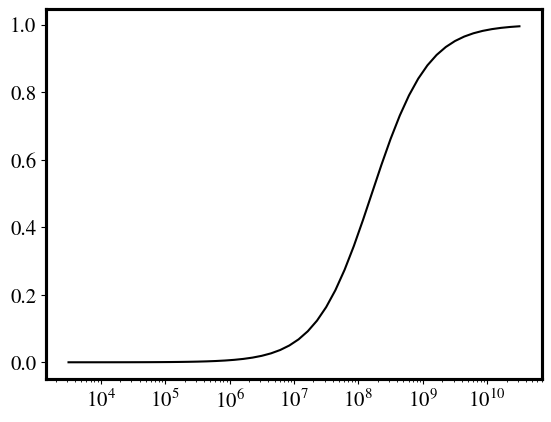

In [58]:
## Sr II
ne_arr = np.logspace(3.5,10.5)
rHe_ItoII = 3e-12*ne_arr/ion_rate
plt.plot(ne_arr, 1/(1+1/rHe_ItoII), color='k' )
plt.xscale('log')

6.5954773869346734
6.665829145728644
6.701005025125628
6.736180904522612
6.7713567839195985
6.806532663316583
6.841708542713568
6.876884422110553
6.876884422110553
6.9120603015075375
6.947236180904523
6.982412060301508
7.052763819095477
7.123115577889447
7.158291457286432
7.193467336683417
7.263819095477387


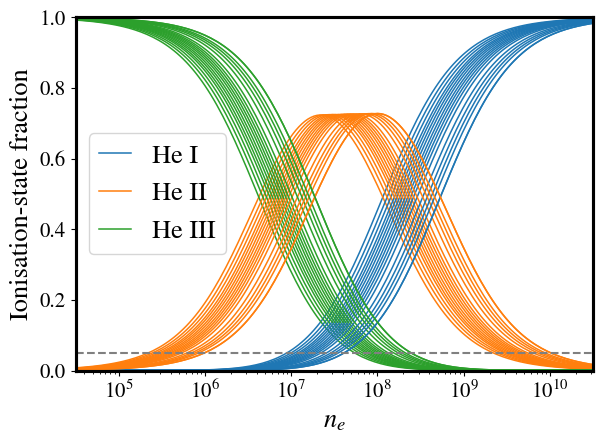

In [62]:
for T in [1000, 1200, 1400, 1600, 1800, 2000, 2250, 2500, 2800, 3100, 3500, 4000, 5000, 6000, 7000, 8000, 10000]:     
    r_rate_IItI, r_rate_IIItII = interp1d(10**T_list, alpha_HeII)(T), interp1d(10**T_list, alpha_HeIII)(T)
    i_rate_ItII = 2.3e-4 #* 5 #1e-7 * 2 # 1e-7 * 2
    i_rate_IItIII = 4.1e-5 #* 5 #1e-6 * 2 # 1e-6 * 2

    ne_arr = np.logspace(3.5,10.5, 200)
    n1_append = []
    n2_append = []
    n3_append = []
    for ne in ne_arr: 
        r_ItoII = r_rate_IItI*ne/i_rate_ItII
        r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII

        n1_append.append( 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII ) )
        n2_append.append( 1/(1+1/r_IItoIII+r_ItoII ) )
        n3_append.append( 1/(1+r_ItoII*r_IItoIII+r_IItoIII) )

    plt.plot(ne_arr, n1_append, color='C0', linewidth=1.1)
    plt.plot(ne_arr, n2_append, color='C1', linewidth=1.1)
    plt.plot(ne_arr, n3_append, color='C2', linewidth=1.1)
    
    print(np.log10(ne_arr[np.array(n3_append)>np.array(n2_append)][-1]))
    

plt.plot(ne_arr, n1_append, label='He I', linewidth=1.1)
plt.plot(ne_arr, n2_append, label='He II', linewidth=1.1)
plt.plot(ne_arr, n3_append, label='He III', linewidth=1.1)
    
plt.xscale('log')
plt.axhline(1, ls='--', color='k')
plt.axhline(0.05, ls='--', color='grey')
plt.legend(frameon=True, handlelength=1.2)
plt.xlabel('$n_e$'), plt.ylabel('Ionisation-state fraction')
plt.ylim(0,1), plt.xlim(10**4.5, 10**10.5)

plt.tight_layout()
#plt.savefig('He_Ionisation_fraction_various_temperatures.png', dpi=300)

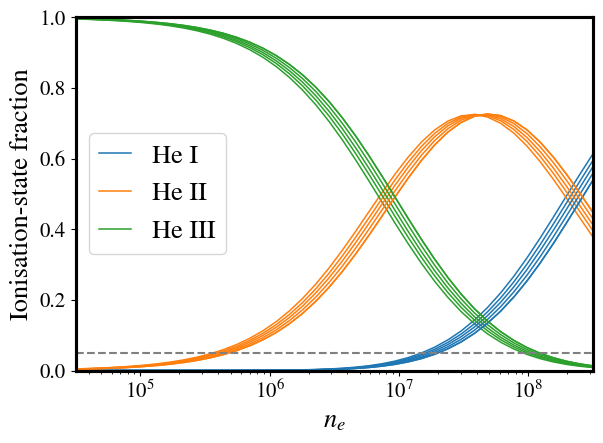

In [63]:
for T in [2250, 2500, 2800, 3100, 3500]: 
    
    r_rate_IItI, r_rate_IIItII = interp1d(10**T_list, alpha_HeII)(T), interp1d(10**T_list, alpha_HeIII)(T)
    
    ne_arr = np.logspace(3.5,8.5)
    n1_append = []
    n2_append = []
    n3_append = []
    for ne in ne_arr: 
        r_ItoII = r_rate_IItI*ne/i_rate_ItII
        r_IItoIII = r_rate_IIItII*ne/i_rate_IItIII

        n1_append.append( 1/( 1+1/r_ItoII+1/r_IItoIII/r_ItoII ) )
        n2_append.append( 1/(1+1/r_IItoIII+r_ItoII ) )
        n3_append.append( 1/(1+r_ItoII*r_IItoIII+r_IItoIII) )

    plt.plot(ne_arr, n1_append, color='C0', linewidth=1.1)
    plt.plot(ne_arr, n2_append, color='C1', linewidth=1.1)
    plt.plot(ne_arr, n3_append, color='C2', linewidth=1.1)
    

plt.plot(ne_arr, n1_append, label='He I', linewidth=1.1)
plt.plot(ne_arr, n2_append, label='He II', linewidth=1.1)
plt.plot(ne_arr, n3_append, label='He III', linewidth=1.1)
    
plt.xscale('log')
plt.axhline(1, ls='--', color='k')
plt.axhline(0.05, ls='--', color='grey')
plt.legend(frameon=True, handlelength=1.2)
plt.xlabel('$n_e$'), plt.ylabel('Ionisation-state fraction')
plt.ylim(0,1), plt.xlim(10**4.5, 10**8.5)

plt.tight_layout()
#plt.savefig('He_Ionisation_fraction_various_temperatures.png', dpi=300)

In [228]:
# Mass of particles
M_sun = 2e33; 
t = 5*24*3600; 
r = np.array([0.10, 0.15, 0.2])*3e10*t

vol = 4/3*np.pi*r**3
mass_of_particle = 100 * 1.67e-24; 
fac = 1

print(np.log10(fac*(0.05 * M_sun)/vol) , r'g/cm^3', )
print(np.log10(fac*(0.05 * M_sun)/vol/mass_of_particle), 'cm^-3') 

[-13.95990361 -14.48817739 -14.8629936 ] g/cm^3
[7.81737991 7.28910614 6.91428993] cm^-3


In [175]:
td = 5
M_tot = 5e-2 * 2e33
w_particle = 100*1.67e-24

#Fraction of Sr II in relevant transition
#kbt = 8.617e-5 * 4900 * (td/1.55)**(-0.40)
#ratio = 5*np.exp(-1.8047/kbt)

N_SR = M_tot / w_particle #Maybe the actual percentage is more like 4%
V = 4/3*np.pi* (3e10*(td*86400))**3 * (0.2**3)

np.log10(N_SR/V)

6.914289927954316

In [10]:
# Mass of particles
M_sun = 2e33; 
t = 1.5*24*3600; 
r = np.array([0.10, 0.15, 0.2, 0.3])*3e10*t

vol = 4/3*np.pi*r**3
mass_of_particle = 100 * 1.67e-24; 
fac = 1

print(np.log10(fac*(0.05 * M_sun)/vol) , r'g/cm^3', )
print(np.log10(fac*(0.05 * M_sun)/vol/mass_of_particle), 'cm^-3') 

print(np.log10(fac*(0.02 * M_sun)/vol/mass_of_particle), 'cm^-3') 

[-12.39126738 -12.91954116 -13.29435737 -13.82263114] g/cm^3
[9.38601615 8.85774237 8.48292616 7.95465239] cm^-3
[8.98807614 8.45980236 8.08498616 7.55671238] cm^-3


In [14]:
# Mass of particles
M_sun = 2e33; 
t = 1.5*24*3600; 
r = np.array([0.3])*3e10*t

vol = 4/3*np.pi*(r**3-np.array([0.2])*3e10*t)
mass_of_particle = 100 * 1.67e-24; 
fac = 1

#print(np.log10(fac*(0.05 * M_sun)/vol) , r'g/cm^3', )
#print(np.log10(fac*(0.05 * M_sun)/vol/mass_of_particle), 'cm^-3') 

print(np.log10(fac*(0.01 * M_sun)/vol/mass_of_particle), 'cm^-3') 

[7.25568238] cm^-3
